In [2]:
import pandas as pd

# John Hopkins csse_covid_19_daily_reports data inconsistent

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/02-04-2020.csv

versus

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv



Lets assume `Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active`

In [3]:
sg = pd.read_csv("singapore.csv", index_col=False, parse_dates=["Last_Update"], names=["Country_Region", "Last_Update", "Lat", "Long", "Confirmed", "Deaths","Recovered","Active"])

In [4]:
sg.shape

(194, 8)

In [5]:
sg.head(3)

,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active
0,Singapore,2020-02-02 01:03:32,18.0,0.0,0,NaN,NaN,NaN
1,Singapore,2020-02-02 01:03:32,18.0,0.0,0,NaN,NaN,NaN
2,Singapore,2020-02-04 15:33:03,24.0,0.0,0,NaN,NaN,NaN


In [6]:
sg.Deaths

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
189    27.0
190    27.0
191    27.0
192    27.0
193    27.0
Name: Deaths, Length: 194, dtype: float64

In [7]:
sg.dtypes

Country_Region            object
Last_Update       datetime64[ns]
Lat                      float64
Long                     float64
Confirmed                  int64
Deaths                   float64
Recovered                float64
Active                   float64
dtype: object

In [8]:
import matplotlib.pyplot as plt

# Howto plot with mathplot lib

<https://discourse.matplotlib.org/t/gnuplot-to-matplotlib-time-series/21496/2>

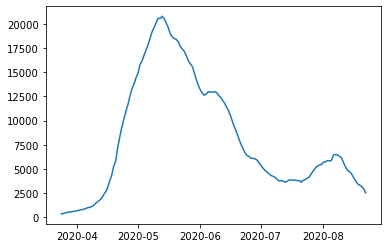

In [9]:
plt.plot("Last_Update", "Active", data=sg)

# Lag window

https://stackoverflow.com/questions/23664877/pandas-equivalent-of-oracle-lead-lag-function

In [10]:
sg

,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active
0,Singapore,2020-02-02 01:03:32,18.0000,0.0000,0,NaN,NaN,NaN
1,Singapore,2020-02-02 01:03:32,18.0000,0.0000,0,NaN,NaN,NaN
2,Singapore,2020-02-04 15:33:03,24.0000,0.0000,0,NaN,NaN,NaN
3,Singapore,2020-02-05 16:33:03,28.0000,0.0000,0,NaN,NaN,NaN
4,Singapore,2020-02-05 16:33:03,28.0000,0.0000,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
189,Singapore,2020-08-17 04:27:20,1.2833,103.8333,55747,27.0,51953.0,3767.0
190,Singapore,2020-08-18 04:27:56,1.2833,103.8333,55838,27.0,52350.0,3461.0
191,Singapore,2020-08-20 04:27:43,1.2833,103.8333,56031,27.0,52810.0,3194.0
192,Singapore,2020-08-21 04:27:41,1.2833,103.8333,56099,27.0,53119.0,2953.0


In [11]:
sg['Confirmed_lagged'] = (sg.sort_values(by=['Last_Update'], ascending=True)).groupby(['Last_update']['Confirmed']).shift(1)

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-11-5973761446b0>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  sg['Confirmed_lagged'] = (sg.sort_values(by=['Last_Update'], ascending=True)).groupby(['Last_update']['Confirmed']).shift(1)


TypeError: list indices must be integers or slices, not str

In [13]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.8.5 (default, Jul 27 2020, 08:42:51) 
[GCC 10.1.0]
Version info.
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
